<h3 align='center'>K Means Clustering</h3>

Problem Statement: Use K Means for customer segmentation. We will cluster people based on their income.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(r"D:\Coding\Machine Learning\dataset\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


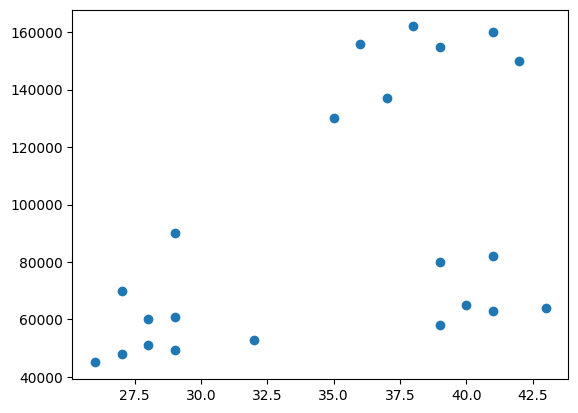

In [2]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

### K Means Clustering

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init='auto')
km.fit(df[["Age", "Income($)"]])
km.labels_

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [5]:
df['Cluster'] = km.labels_
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


<Axes: xlabel='Age', ylabel='Income($)'>

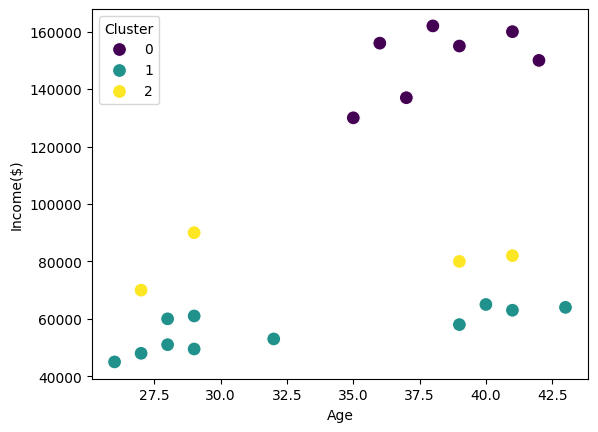

In [6]:
import seaborn as sns

sns.scatterplot(df, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")

### Min Max Scaling

Clusters are not formed properly. It can be due to Age and Income columns being on a different scale. We can try scaling them

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(columns=['Age', 'Income($)'])

df_scaled[["Age", "Income($)"]] = scaler.fit_transform(df[["Age", "Income($)"]])
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [10]:
km = KMeans(n_clusters=3, n_init='auto')
km.fit(df_scaled[["Age", "Income($)"]])
df_scaled['Cluster'] = km.labels_
df_scaled.head()

,Age,Income($),Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


In [11]:
km.inertia_

0.4750783498553096

In [12]:
centroids = km.cluster_centers_
centroids

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

<Axes: xlabel='Age', ylabel='Income($)'>

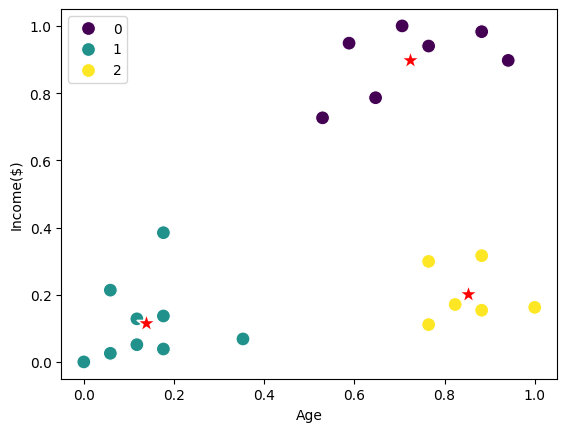

In [13]:
sns.scatterplot(df_scaled, x='Age', y='Income($)',  palette='viridis', s=100, hue="Cluster")
sns.scatterplot(x=centroids[:,0], y=centroids[:,1],  s=200, color="red", marker='*')

### Elbow method to determine optimal number of clusters

In [14]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df_scaled[["Age", "Income($)"]])
    sse.append(km.inertia_) #SSE
sse

[5.434011511988178,
 2.3456144914725936,
 0.4750783498553096,
 0.3923766528801946,
 0.29636232583213035,
 0.25014078658109806,
 0.19784877345763704,
 0.1682782042055842,
 0.12738829799021148]

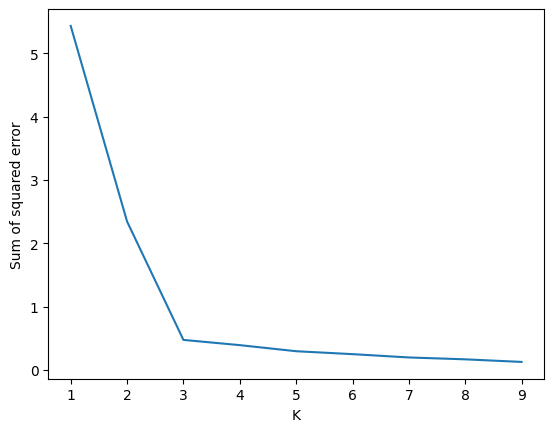

In [15]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

The chart shows optimal number of clusters are 3